<a href="https://colab.research.google.com/github/Catahenri/2TDSG-SwModelo/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [377]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



%matplotlib inline

In [378]:
df = pd.read_csv('aptos.csv')

In [379]:
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Idade : É a quantidae de anos que se passaram desde o nascimento da pessoa.
- Marca : É a indentificação que mostra a empresa que fabricou o carro
- Combustível : É uma substrancia que fornece calor e energia para os veículos.
-Especíe : São características em comuns que dividem os diferentes tipos de flores.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  O preço de apartementos aumenta conforma a metragem.
2.  Aparmentos com a mesma metragem, variam o preço baseados em sua localização.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [380]:

df[['quartos', 'bairro']].head(100)

#Em média, 50% dos aparmentos independente do bairro, tem 3 quartos
#Os unicos apartamentos com 4 quartos, estão localizados no centro


,quartos,bairro
0,3,Vila Lusitania
1,3,Vila Lusitania
2,2,Ferrazopolis
3,3,Centro
4,3,Vila Lusitania
...,...,...
95,3,Baeta Neves
96,3,Rudge Ramos
97,2,Iraja
98,2,Santa Teresinha


In [310]:
valor = df['valor']
bairro = df['bairro']

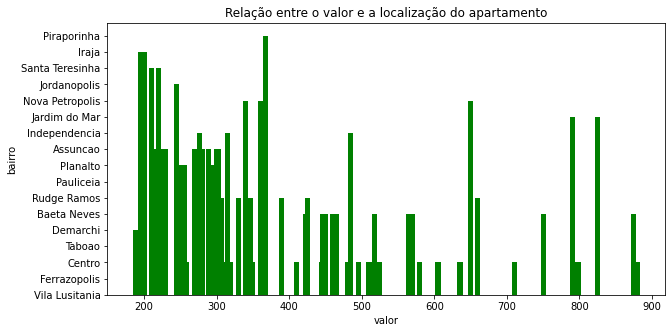

In [381]:
fig = plt.figure(figsize = (10, 5))

plt.bar(valor, bairro, color ='green', width = 7)

plt.xlabel("valor")

plt.ylabel("bairro")

plt.title("Relação entre o valor e a localização do apartamento")

plt.show()



In [382]:
metros = df['metros']
vagas = df['vagas']

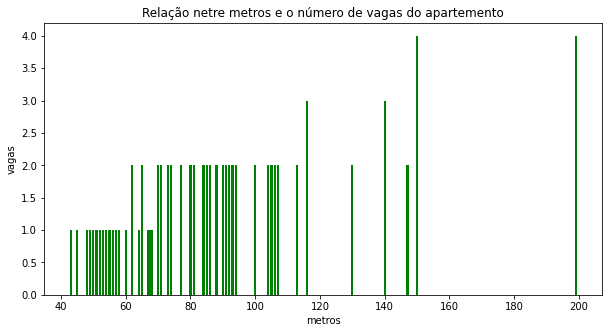

In [383]:
fig = plt.figure(figsize = (10, 5))

plt.bar(metros, vagas, color ='green',
width = 0.7)

plt.xlabel("metros")

plt.ylabel("vagas")

plt.title("Relação netre metros e o número de vagas do apartemento")

plt.show()

#Os apartameno com o maior numero de vagas, sao os apartmentos com os maior numero de metragem
#A maioria dos apartamentos apresentam de 1 até 2 vagas

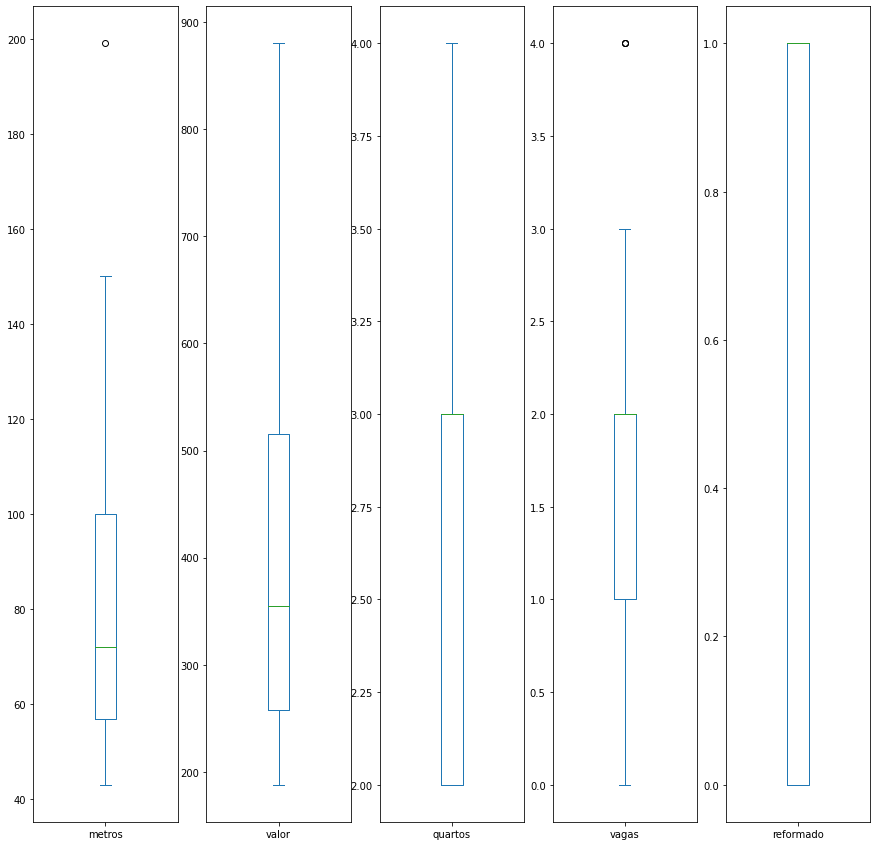

In [384]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 15))
plt.show()

#50% dos apartamentes tem metragem aproximadmente entre 60 e 100 m²



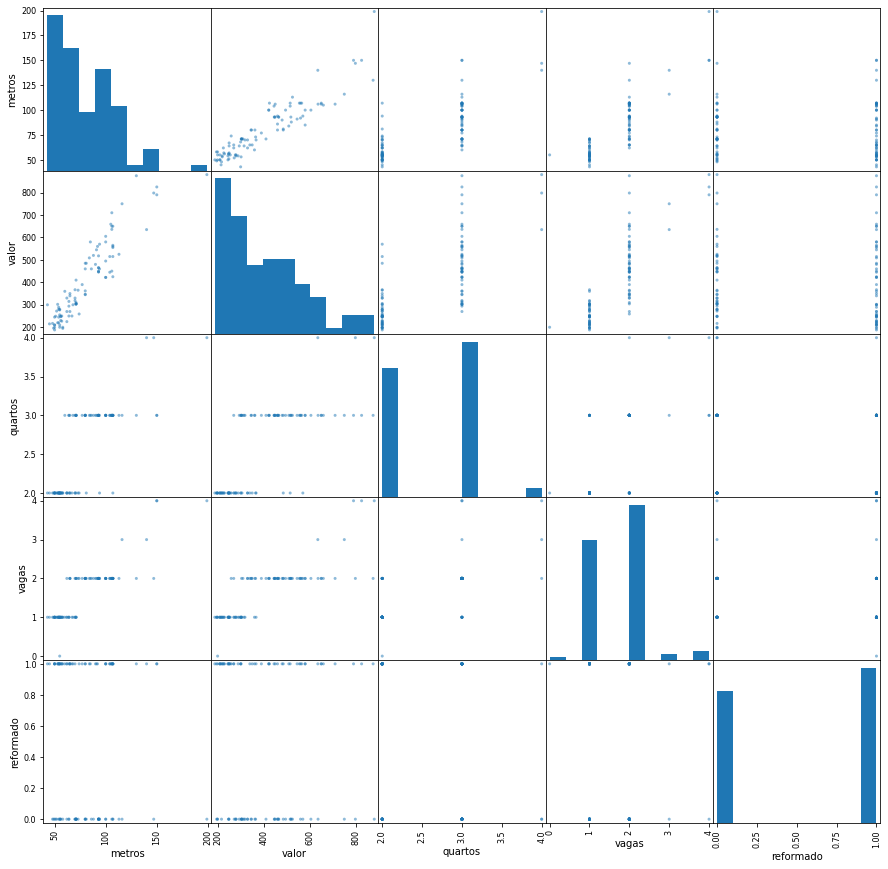

In [385]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15, 15))
plt.show()

#Quanto maior a metragem do aprmento, maior será seu valor
#Se o apartmente estiver ou não refornando não terá impacto no valor do apartamento
#Tem praticamnete a mesma quantidade de apartamentos reformando e não reformando

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

RESPOSTA EX BÔNUS: Sim , foram localizados os dados outliers , eles foram removidos através da função remove. Podemos ver gráficos do antes e depois da remoção dos dados outliers.
Os dados utilizados para análise foram: valor e metro. Os dados foram providos do dataset aptos.csv

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [387]:
df_raw = pd.read_csv('aptos.csv')

In [388]:
df_raw.head()

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania


In [389]:
df_raw.shape

(100, 6)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [391]:
def plot_boxplot(df , ft):
  df.boxplot(column=[ft])
  plt.grid()
  plt.show()

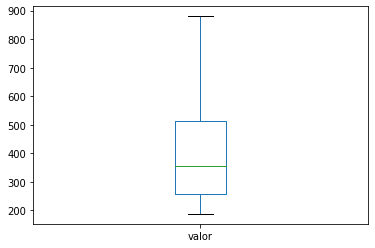

In [392]:
plot_boxplot(df_raw, "valor")

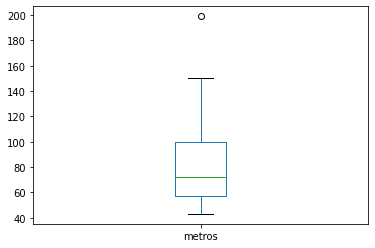

In [393]:
plot_boxplot(df_raw, "metros")

In [394]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  
  return ls

In [395]:
index_list = []
for feature in ['valor' , 'metros']:
  index_list.extend(outliers(df_raw , feature))

In [396]:
index_list

[38]

In [397]:
def remove(df , ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df


In [398]:
df_cleaned = remove(df_raw, index_list)

In [399]:
df_cleaned.shape

(99, 6)

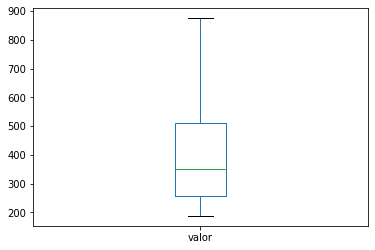

In [400]:
plot_boxplot(df_cleaned, 'valor')

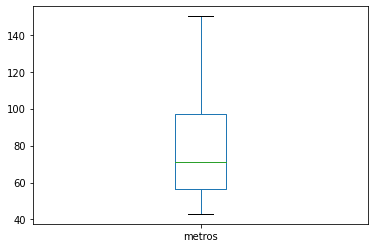

In [401]:
plot_boxplot(df_cleaned, 'metros')

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear
2. Regressão Polinamial

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Regressão Linear : Preve o valor de uma variável com base no valor de outra. A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.A regressão linear encontra a linha que melhor representa as variáveis de entrada com a variável de saída.
2. Regressao Polinomial : Este procedimento ajusta até 10 diferentes modelos de regressão para duas variáveis, sendo uma dependente e uma independente. A variável independente é expandida num polinômio até o décimo grau com geração de novas variáveis.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [474]:
model = LinearRegression()

In [520]:
X = df[['valor', 'quartos',]]
Y = df['metros']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (100, 3) e saidas (100,)


In [521]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(80, 3)
(20, 3)
(80,)
(20,)


In [ ]:
X_treino.head()

In [478]:
Y_treino.head()

3     104
93     90
59     94
47     93
98     53
Name: metros, dtype: int64

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [523]:
modelo.fit(X_treino, Y_treino)

LinearRegression()

In [524]:
print("R quadrado = {}".format(modelo.score(X_treino, Y_treino)))

R quadrado = 0.8527975130252838


In [525]:
from sklearn import metrics

In [526]:
y_predict =modelo.predict(X_teste)
print("R quadrado = {}".format(metrics.r2_score(Y_teste, y_predict).round(2)))

R quadrado = 0.91


### Algoritmo 2

Soma dos Erros ao Quadrado (SSE): 238 
Erro Quadrático Médio (MSE): 11.90
Erro Médio Absoluto (MAE): 2.66
Raiz do Erro Quadrático Médio (RMSE): 3.45 
R2-score: 0.98


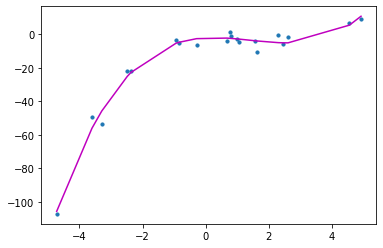

In [527]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)


x = x[:, np.newaxis]
y = y[:, np.newaxis]


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)



model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')
plt.show()







Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

Qual dos algoritmos obteve um resultado melhor? Justifique
R: O de Regressao Polinomial pois apresentou um R2-score mais proximo de 1

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [573]:

X = df[['metros', 'quartos', 'vagas', 'reformado']]
Y = df['valor']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")




Formato das tabelas de dados (100, 4) e saidas (100,)


In [574]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y,  test_size=0.4)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)


(60, 4)
(40, 4)
(60,)
(40,)


In [575]:
X_treino.head()

,metros,quartos,vagas,reformado
42,64,3,1,0
74,50,2,1,1
13,71,3,1,0
3,104,3,2,1
77,65,2,2,1


In [576]:
Y_treino.head()

42    315
74    210
13    303
3     515
77    340
Name: valor, dtype: int64

In [577]:
lr.fit(X_treino, Y_treino)

LinearRegression()

In [578]:
ap = lr.predict([[65,2, 2, 1]])
print(ap)


[335.85224297]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:Sim, o resultado está muito proximo do valor de um apartamento com caracteristicas semelhantes no bairro "Centro"

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Forneceria uma base de dados maior com mais informações e treinaria um arede neural para tentar melhorar o resultado;




